In [19]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = "Arial"
matplotlib.style.use('ggplot')
import seaborn as sns
sns.set_style("whitegrid")
sns.set_color_codes("muted")


import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import folium
from folium.plugins import HeatMap

from collections import Counter
import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p
import statsmodels
import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')
pd.set_option("max_column",500)

In [61]:
#Detailed Listings data for New York City
lists_NYC=pd.read_csv('listings_NYC.csv')
lists_NYC.head()

id                        listing_url       scrape_id last_scraped  \
0  2595  https://www.airbnb.com/rooms/2595  20200212052319   2020-02-12   
1  3831  https://www.airbnb.com/rooms/3831  20200212052319   2020-02-13   
2  5099  https://www.airbnb.com/rooms/5099  20200212052319   2020-02-12   
3  5121  https://www.airbnb.com/rooms/5121  20200212052319   2020-02-12   
4  5178  https://www.airbnb.com/rooms/5178  20200212052319   2020-02-13   

                                        name  \
0                      Skylit Midtown Castle   
1            Cozy Entire Floor of Brownstone   
2  Large Cozy 1 BR Apartment In Midtown East   
3                            BlissArtsSpace!   
4           Large Furnished Room Near B'way    

                                             summary  \
0  Beautiful, spacious skylit studio in the heart...   
1  Urban retreat: enjoy 500 s.f. floor in 1899 br...   
2  My large 1 bedroom apartment has a true New Yo...   
3                                                NaN   
4  Please don’t expect the luxury here just a bas...   

                                               space  \
0  - Spacious (500+ft²), immaculate and nicely fu...   
1  Greetings!      We own a double-duplex brownst...   
2  I have a large 1 bedroom apartment centrally l...   
3  HELLO EVERYONE AND THANKS FOR VISITING BLISS A...   
4  You will use one large, furnished, private roo...   

                                         description experiences_offered  \
0  Beautiful, spacious skylit studio in the heart...                none   
1  Urban retreat: enjoy 500 s.f. floor in 1899 br...                none   
2  My large 1 bedroom apartment has a true New Yo...                none   
3  HELLO EVERYONE AND THANKS FOR VISITING BLISS A...                none   
4  Please don’t expect the luxury here just a bas...                none   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1  Just the right mix of urban center and local n...   
2  My neighborhood in Midtown East is called Murr...   
3                                                NaN   
4    Theater district, many restaurants around here.   

                                               notes  \
0                                                NaN   
1                                                NaN   
2  Read My Full Listing For All Information. New ...   
3                                                NaN   
4  Reservation should be made at least a few days...   

                                             transit  \
0  Apartment is located on 37th Street between 5t...   
1  B52 bus for a 10-minute ride to downtown Brook...   
2  From the apartment is a 10 minute walk to Gran...   
3                                                NaN   
4                                                NaN   

                                              access  \
0  Guests have full access to the kitchen, bathro...   
1  You will have the private, exclusive use of an...   
2                      I will meet you upon arrival.   
3                                                NaN   
4  Bathroom is shared with the host but the kitch...   

                                         interaction  \
0  I am a Sound Therapy Practitioner and Kundalin...   
1  We'll be around, but since you have the top fl...   
2  I usually check in with guests via text or ema...   
3                                                NaN   
4                                                NaN   

                                         house_rules  thumbnail_url  \
0  Make yourself at home, respect the space and t...            NaN   
1  Smoking - outside please; pets allowed but ple...            NaN   
2  • Check-in time is 2PM. • Check-out time is 12...            NaN   
3                                                NaN            NaN   
4  No smoking in the room. When you check out, pl...            NaN   

   medium_url         

In [54]:
lists_NYC['last_scraped'].unique()

array(['2020-02-12', '2020-02-13'], dtype=object)

In [21]:
lists_NYC.shape

(51097, 106)

In [22]:
#columns_to_keep = ['id','name','summary','longitude','latitude','space','description','instant_bookable',
          # 'neighborhood_overview','neighbourhood_cleansed','neighbourhood_group_cleansed','host_id','host_name','host_since',
          # 'host_response_time','review_scores_rating','property_type','room_type',
          # 'accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities',
          # 'cancellation_policy','number_of_reviews','square_feet','guests_included','price']
        
#categorical
categorical_features = ['property_type','room_type','bed_type','host_since','host_response_time',
                        'neighbourhood_cleansed','neighbourhood_group_cleansed','amenities','cancellation_policy'
                       ]

#numerical 
numberical_features = ['price','id','host_id','latitude','longitude','bathrooms','bedrooms','beds',
                       'guests_included','minimum_nights','availability_30','availability_60','availability_90','availability_365',
                       'number_of_reviews','calculated_host_listings_count_entire_homes','reviews_per_month'
                      ]

In [23]:
#lists.describe(include=["object"])

In [24]:
#lists.describe()

In [25]:
#lists.info(verbose=True, null_counts=True)

In [26]:
lists_NYC = lists_NYC[categorical_features+numberical_features]

In [27]:
lists_NYC.head()

property_type        room_type  bed_type  host_since  host_response_time  \
0     Apartment  Entire home/apt  Real Bed  2008-09-09        within a day   
1   Guest suite  Entire home/apt  Real Bed  2008-12-07      within an hour   
2     Apartment  Entire home/apt  Real Bed  2009-02-02                 NaN   
3     Apartment     Private room     Futon  2009-02-03                 NaN   
4     Apartment     Private room  Real Bed  2009-03-03  within a few hours   

  neighbourhood_cleansed neighbourhood_group_cleansed  \
0                Midtown                    Manhattan   
1           Clinton Hill                     Brooklyn   
2            Murray Hill                    Manhattan   
3     Bedford-Stuyvesant                     Brooklyn   
4         Hell's Kitchen                    Manhattan   

                                           amenities  \
0  {TV,Wifi,"Air conditioning",Kitchen,"Paid park...   
1  {TV,"Cable TV",Internet,Wifi,"Air conditioning...   
2  {TV,"Cable TV",Internet,Wifi,"Air conditioning...   
3  {Wifi,"Air conditioning",Kitchen,"Pets live on...   
4  {TV,Wifi,"Air conditioning","Paid parking off ...   

           cancellation_policy    price    id  host_id  latitude  longitude  \
0  strict_14_with_grace_period  $225.00  2595     2845  40.75362  -73.98377   
1                     moderate   $89.00  3831     4869  40.68514  -73.95976   
2                     moderate  $200.00  5099     7322  40.74767  -73.97500   
3  strict_14_with_grace_period   $60.00  5121     7356  40.68688  -73.95596   
4  strict_14_with_grace_period   $79.00  5178     8967  40.76489  -73.98493   

   bathrooms  bedrooms  beds  guests_included  minimum_nights  \
0        1.0       0.0   1.0                1               7   
1        1.0       1.0   4.0                1               1   
2        1.0       1.0   1.0                2               3   
3        NaN       1.0   1.0                1              29   
4        1.0       1.0   1.0                1               2   

   availability_30  availability_60  availability_90  availability_365  \
0               30               60               90               365   
1                7                8               14               137   
2                0                0                0                 0   
3               30               60               90               365   
4                6                8               13               216   

   number_of_reviews  calculated_host_listings_count_entire_homes  \
0                 48                                            2   
1                307                                            1   
2                 78                                            1   
3                 50                                            0   
4                463                                            0   

   reviews_per_month  
0               0.39  
1               4.69  
2               0.59  
3               0.38  
4               3.53

In [28]:
lists_NYC.shape

(51097, 26)

# 1. Data Preprocessing

In [29]:
#missing values
total = lists_NYC.isnull().sum().sort_values(ascending=False)
percent = (lists_NYC.isnull().sum())/lists.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(106)

Total   Percent
host_response_time                           18859.0       NaN
reviews_per_month                            10348.0  0.202517
beds                                           340.0       NaN
bedrooms                                        75.0       NaN
bathrooms                                       47.0       NaN
host_since                                       6.0       NaN
calculated_host_listings_count_entire_homes      0.0       NaN
number_of_reviews                                0.0  0.000000
availability_365                                 0.0  0.000000
availability_90                                  0.0       NaN
availability_60                                  0.0       NaN
availability_30                                  0.0       NaN
minimum_nights                                   0.0  0.000000
guests_included                                  0.0       NaN
longitude                                        0.0  0.000000
price                                            0.0  0.000000
host_id                                          0.0  0.000000
latitude                                         0.0  0.000000
cancellation_policy                              0.0       NaN
amenities                                        0.0       NaN
neighbourhood_group_cleansed                     0.0       NaN
neighbourhood_cleansed                           0.0       NaN
bed_type                                         0.0       NaN
room_type                                        0.0  0.000000
id                                               0.0  0.000000
property_type                                    0.0       NaN
calculated_host_listings_count                   NaN       NaN
host_name                                        NaN       NaN
last_review                                      NaN       NaN
name                                             NaN       NaN
neighbourhood                                    NaN       NaN
neighbourhood_group                              NaN       NaN

In [63]:
# replacing NaN values with 0
lists_NYC['price'] = lists_NYC['price'].apply(lambda x: x.replace('$','').replace(',',''))
lists_NYC['price'] = lists_NYC['price'].astype(float)
lists_NYC.fillna(0, inplace=True)
lists_NYC.rename(columns={'neighbourhood_group_cleansed':'borough',
                     'neighbourhood_cleansed':'neighbourhood'},inplace = True)

In [31]:
lists_NYC.head()

property_type        room_type  bed_type  host_since  host_response_time  \
0     Apartment  Entire home/apt  Real Bed  2008-09-09        within a day   
1   Guest suite  Entire home/apt  Real Bed  2008-12-07      within an hour   
2     Apartment  Entire home/apt  Real Bed  2009-02-02                   0   
3     Apartment     Private room     Futon  2009-02-03                   0   
4     Apartment     Private room  Real Bed  2009-03-03  within a few hours   

        neighbourhood    borough  \
0             Midtown  Manhattan   
1        Clinton Hill   Brooklyn   
2         Murray Hill  Manhattan   
3  Bedford-Stuyvesant   Brooklyn   
4      Hell's Kitchen  Manhattan   

                                           amenities  \
0  {TV,Wifi,"Air conditioning",Kitchen,"Paid park...   
1  {TV,"Cable TV",Internet,Wifi,"Air conditioning...   
2  {TV,"Cable TV",Internet,Wifi,"Air conditioning...   
3  {Wifi,"Air conditioning",Kitchen,"Pets live on...   
4  {TV,Wifi,"Air conditioning","Paid parking off ...   

           cancellation_policy  price    id  host_id  latitude  longitude  \
0  strict_14_with_grace_period  225.0  2595     2845  40.75362  -73.98377   
1                     moderate   89.0  3831     4869  40.68514  -73.95976   
2                     moderate  200.0  5099     7322  40.74767  -73.97500   
3  strict_14_with_grace_period   60.0  5121     7356  40.68688  -73.95596   
4  strict_14_with_grace_period   79.0  5178     8967  40.76489  -73.98493   

   bathrooms  bedrooms  beds  guests_included  minimum_nights  \
0        1.0       0.0   1.0                1               7   
1        1.0       1.0   4.0                1               1   
2        1.0       1.0   1.0                2               3   
3        0.0       1.0   1.0                1              29   
4        1.0       1.0   1.0                1               2   

   availability_30  availability_60  availability_90  availability_365  \
0               30               60               90               365   
1                7                8               14               137   
2                0                0                0                 0   
3               30               60               90               365   
4                6                8               13               216   

   number_of_reviews  calculated_host_listings_count_entire_homes  \
0                 48                                            2   
1                307                                            1   
2                 78                                            1   
3                 50                                            0   
4                463                                            0   

   reviews_per_month  
0               0.39  
1               4.69  
2               0.59  
3               0.38  
4               3.53

# EDA

###  1.Most popular Airbnb locations in NYC
 * Manhattan has the most number of listings
 * On top 5 neighbourhoods,three(bedford stuyvesant/Williamsburg/Bushwick) are from Brooklyn, two(Harlem/Hell's kitchen) are from Manhattan
 * There are some extreme high prices in Manhattam

Text(-6.949999999999996, 0.5, 'Number of listings')

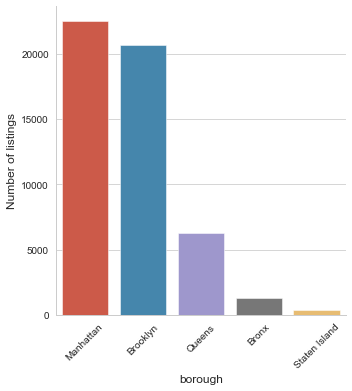

In [32]:
# The number of listings by borough
number_list_borough = lists_NYC.groupby('borough').id.count().reset_index().sort_values(by='id', ascending=False).head(5)
sns.catplot(x="borough", y="id", kind="bar", data=number_list_borough,ci=None)
plt.xticks(rotation=45)
plt.ylabel('borough')
plt.ylabel('Number of listings')

In [67]:
lists_NYC['price']

0        225.0
1         89.0
2        200.0
3         60.0
4         79.0
         ...  
51092    120.0
51093     60.0
51094    144.0
51095     45.0
51096    190.0
Name: price, Length: 51097, dtype: float64

In [74]:
lists_NYC[lists_NYC['borough']=='Manhattan']['price'].mean()

215.08307774369916

In [75]:
lists_NYC[lists_NYC['borough']=='Brooklyn']['price'].mean()

125.08654172114872

Text(-1.4499999999999957, 0.5, 'Number of listings')

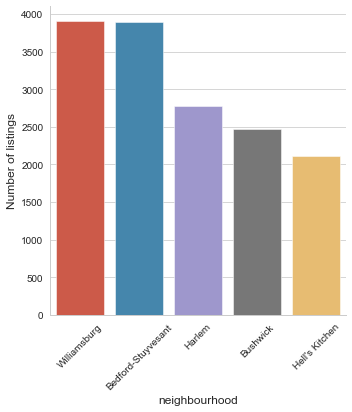

In [33]:
#TOP 5 neighbourhood with most listings
number_list_borough = lists_NYC.groupby('neighbourhood').id.count().reset_index().sort_values(by='id', ascending=False).head(5)
sns.catplot(x="neighbourhood", y="id", kind="bar", data=number_list_borough,ci=None)
plt.xticks(rotation=45)
plt.ylabel('neighbourhood')
plt.ylabel('Number of listings')

In [51]:
# Listings Geo information with price
Price=lists_NYC.groupby(['latitude','longitude'])['price'].mean().reset_index()

fig = px.scatter_mapbox(Price, 
                        lat="latitude", lon="longitude",size="price",size_max=12,
                        color="price", color_continuous_scale=px.colors.sequential.Inferno, zoom=11)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

### 2.AirBnB Type  in NYC

 * Entire home/apt and Private room are the most common room type
 * Apartment is the most property type
 * Most are real beds

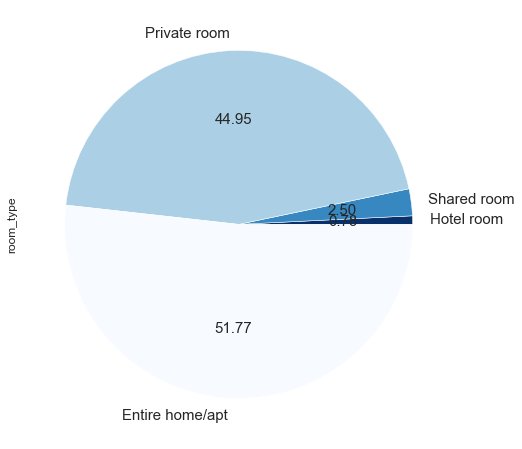

In [35]:
room_df = pd.DataFrame.from_dict(Counter(lists_NYC.room_type), orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Blues_r', 
                 figsize=(8,8), 
                 fontsize = 15, autopct = '%.2f',
                 legend = False)

In [36]:
number_list_property_type = lists_NYC.groupby('property_type').id.count().reset_index().rename(columns ={'id':'number of listings'}).sort_values(by='number of listings', ascending=False)

In [37]:
number_list_property_type

property_type  number of listings
1                Apartment               39936
23                   House                4218
35               Townhouse                1720
13             Condominium                1693
28                    Loft                1398
31      Serviced apartment                 460
19             Guest suite                 436
5           Boutique hotel                 406
22                   Hotel                 273
29                   Other                  93
20              Guesthouse                  76
30                  Resort                  76
21                  Hostel                  64
3        Bed and breakfast                  58
6                 Bungalow                  34
38                   Villa                  31
34              Tiny house                  23
9                Camper/RV                  21
0               Aparthotel                  16
4                     Boat                   9
14                 Cottage                   8
17             Earth house                   8
32                    Tent                   6
10  Casa particular (Cuba)                   4
12                    Cave                   4
2                     Barn                   3
24               Houseboat                   3
11                  Castle                   2
7                      Bus                   2
8                    Cabin                   2
39                    Yurt                   2
27              Lighthouse                   2
26                  Island                   2
15              Dome house                   2
33               Timeshare                   1
25                  In-law                   1
36                   Train                   1
37               Treehouse                   1
16                    Dorm                   1
18               Farm stay                   1

In [38]:
number_list_bedtype = lists_NYC.groupby('bed_type').id.count().reset_index().rename(columns ={'id':'number of listings'}).sort_values(by='number of listings', ascending=False)
number_list_bedtype

bed_type  number of listings
4       Real Bed               50372
2          Futon                 269
3  Pull-out Sofa                 235
0         Airbed                 155
1          Couch                  66

In [39]:
from nltk.corpus import stopwords
import string
import nltk
import re
from wordcloud import WordCloud, STOPWORDS

In [40]:
amenitiesDF = lists_NYC[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

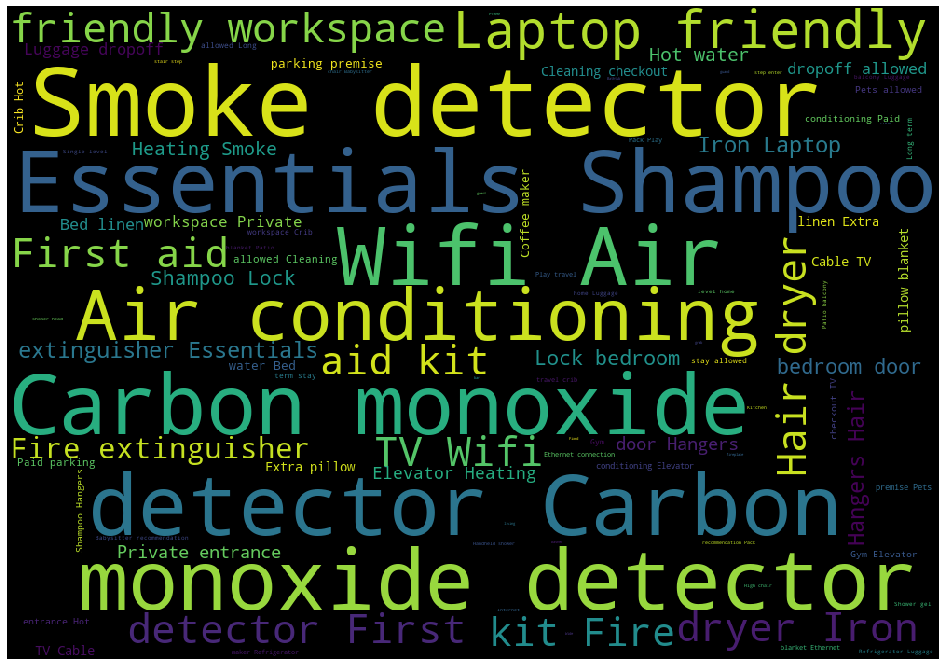

In [41]:
wordcloud = WordCloud(width = 1000, height = 700).generate(allemenities_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 3.  Differences in listings Price

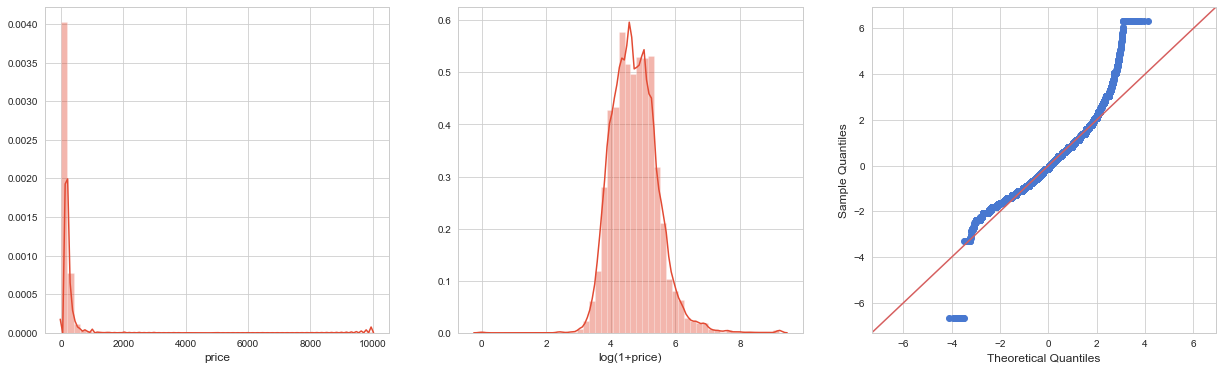

In [42]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(lists_NYC['price'], ax=axes[0])
sns.distplot(np.log1p(lists_NYC['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(lists_NYC['price']), stats.norm, fit=True, line='45', ax=axes[2]);

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

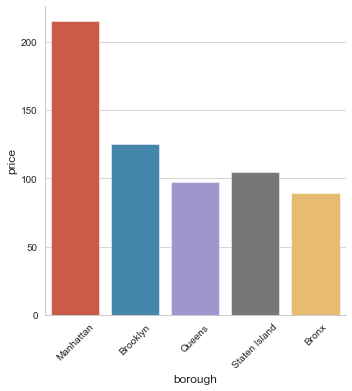

In [43]:
#average price per borough
sns.catplot(x="borough", y="price", kind="bar", data=lists_NYC,ci=None)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

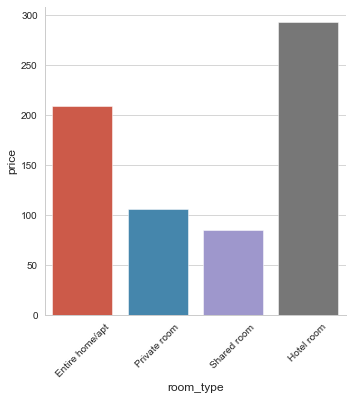

In [44]:
##average price per room_type
sns.catplot(x="room_type", y="price", kind="bar",data=lists_NYC,ci=None)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

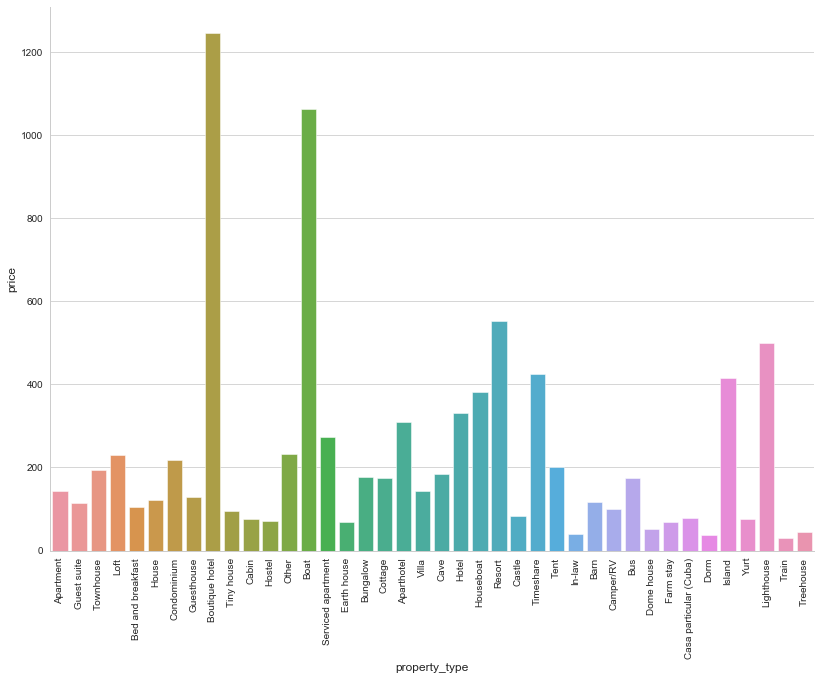

In [45]:
#average price for property type
sns.catplot(x="property_type", y="price", kind="bar",data=lists_NYC,ci=None,height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=90)

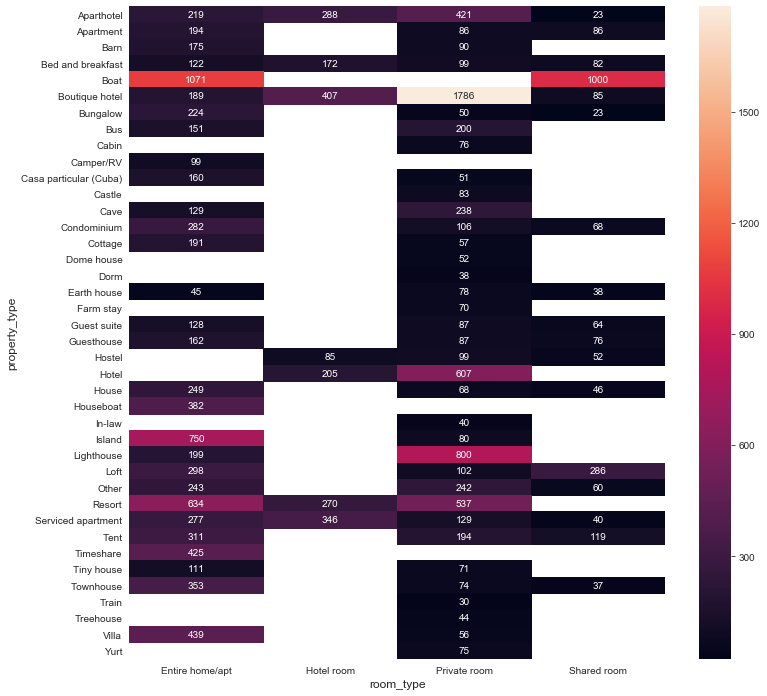

In [46]:
# HeatMap for variation of prices with number of bedrooms for listings
plt.figure(figsize=(12,12))
sns.heatmap(lists_NYC.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")

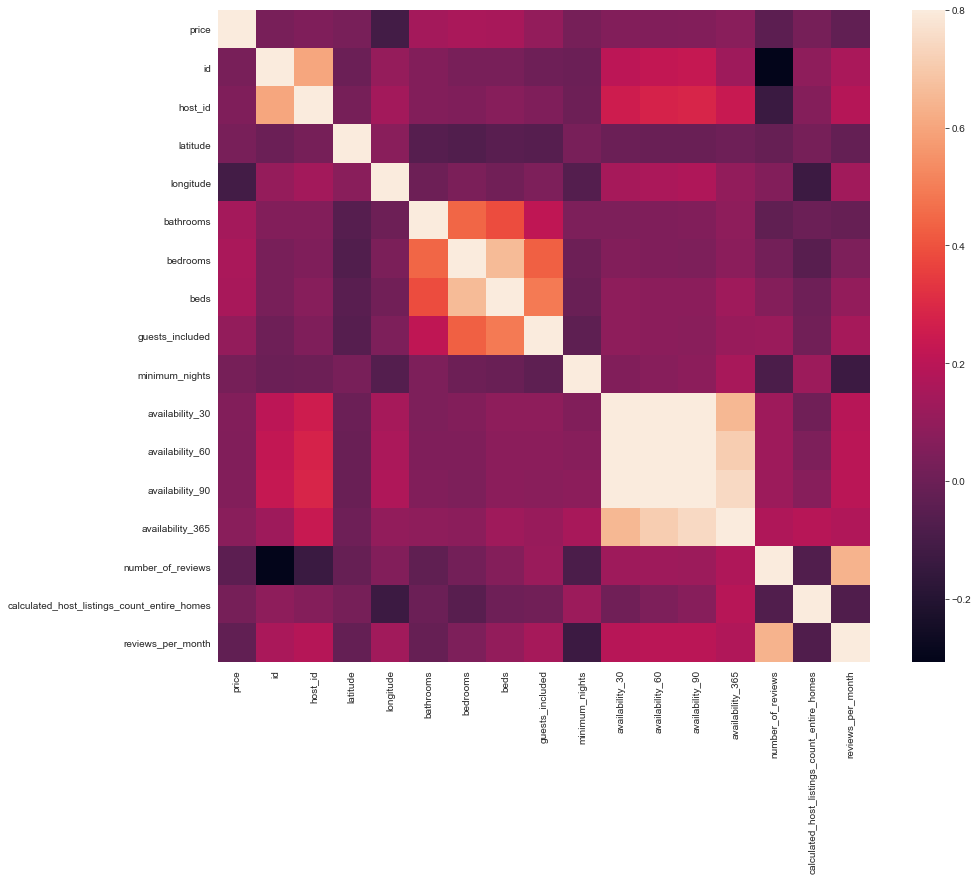

In [47]:
corrmatrix = lists_NYC.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmatrix, vmax=0.8, square=True)
sns.set(font_scale=0.8)

In [48]:
#categorical
categorical_features = ['property_type','room_type','bed_type','host_since','host_response_time',
                        'neighbourhood_cleansed','neighbourhood_group_cleansed','amenities','cancellation_policy'
                       ]

#numerical 
numberical_features = ['price','id','host_id','latitude','longitude','bathrooms','bedrooms','beds',
                       'guests_included','minimum_nights','availability_30','availability_60','availability_90','availability_365',
                       'number_of_reviews','calculated_host_listings_count_entire_homes','reviews_per_month'
                      ]

# Model

In [49]:
from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample
from xgboost import XGBRegressor

In [50]:
categorical_features = lists_NYC.select_dtypes(include=['object'])
print('Categorical features: {}'.format(categorical_features.shape))

Categorical features: (51097, 9)


In [2]:
import pandas as pd

In [3]:
arrest_NYC=pd.read_csv('NYPD_Arrests_Data__Historic_.csv')

In [4]:
arrest_NYC.head()

ARREST_KEY ARREST_DATE  PD_CD                               PD_DESC  KY_CD  \
0   173130602  12/31/2017  566.0                 MARIJUANA, POSSESSION  678.0   
1   173114463  12/31/2017  478.0       THEFT OF SERVICES, UNCLASSIFIED  343.0   
2   173113513  12/31/2017  849.0  NY STATE LAWS,UNCLASSIFIED VIOLATION  677.0   
3   173113423  12/31/2017  101.0                             ASSAULT 3  344.0   
4   173113421  12/31/2017  101.0                             ASSAULT 3  344.0   

                         OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0          MISCELLANEOUS PENAL LAW  PL 2210500          V           Q   
1  OTHER OFFENSES RELATED TO THEFT  PL 1651503          M           Q   
2                 OTHER STATE LAWS  LOC000000V          V           K   
3     ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           M   
4     ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           M   

   ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX  \
0              105                0.0     25-44        M   
1              114                0.0     25-44        M   
2               73                1.0     18-24        M   
3               18                0.0     25-44        M   
4               18                0.0     45-64        M   

                  PERP_RACE  X_COORD_CD  Y_COORD_CD   Latitude  Longitude  
0                     BLACK   1063056.0    207463.0  40.735772 -73.715638  
1  ASIAN / PACIFIC ISLANDER   1009113.0    219613.0  40.769437 -73.910241  
2                     BLACK   1010719.0    186857.0  40.679525 -73.904572  
3                     WHITE    987831.0    217446.0  40.763523 -73.987074  
4                     BLACK    987073.0    216078.0  40.759768 -73.989811

In [11]:
arrest_NYC.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude'],
      dtype='object')

In [12]:
arrest_NYC = arrest_NYC[['ARREST_DATE','Latitude','Longitude']]

In [13]:
arrest_NYC.columns

Index(['ARREST_DATE', 'Latitude', 'Longitude'], dtype='object')

In [16]:
arrest_NYC.head()

ARREST_DATE   Latitude  Longitude
0  12/31/2017  40.735772 -73.715638
1  12/31/2017  40.769437 -73.910241
2  12/31/2017  40.679525 -73.904572
3  12/31/2017  40.763523 -73.987074
4  12/31/2017  40.759768 -73.989811

In [18]:
arrest_NYC['year']=pd.to_datetime(arrest_NYC['ARREST_DATE'], format='%m/%d/%Y').dt.year

In [21]:
arrest_NYC = arrest_NYC[arrest_NYC['year'] == 2019]

In [23]:
arrest_NYC.shape

(214617, 4)

In [25]:
arrest_NYC.to_csv(r'NYC_2019_Arrest.csv', index = False, header=True)

In [46]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import seaborn as sns
sns.set(style="whitegrid")

import fiona
import fiona.crs
import shapely
import rtree

import pandas as pd
import geopandas as gpd

In [56]:
# This is to load the shape file
shapefile = 'ZIP_CODE_040114/ZIP_CODE_040114.shp'

# And project it into EPSG:2263 (NAD 83 NY State) plane,Coordinate Reference System (CRS) 
neighborhoods = gpd.read_file(shapefile).to_crs(fiona.crs.from_epsg(2263))

In [57]:
neighborhoods.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0   11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1   11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2   11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3   11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4   11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((1038098.252 188138.380, 1038141.936 ...  
1  POLYGON ((1001613.713 186926.440, 1002314.243 ...  
2  POLYGON ((1011174.276 183696.338, 1011373.584 ...  
3  POLYGON ((995908.365 183617.613, 996522.848 18...  
4  POLYGON ((991997.113 176307.496, 992042.798 17...

In [60]:
index = rtree.Rtree()
for idx,geometry in enumerate(neighborhoods.geometry):
    index.insert(idx, geometry.bounds)

In [66]:
index.bounds

[913129.0188708156, 120020.85646513104, 1067494.2754283994, 272710.94937829673]

In [50]:
import pyproj
import shapely.geometry as geom

proj = pyproj.Proj(init="epsg:2263", preserve_units=True)    
counts = {}

for index, row in arrest_NYC.iterrows(): 
        p = geom.Point(proj(float(row[2]), float(row[1])))
        match = None
        for idx in index.intersection((p.x, p.y, p.x, p.y)):
            if neighborhoods.geometry[idx].contains(p):
                match = idx
                break
        if match:
            counts[match] = counts.get(match, 0) + 1

AttributeError: 'int' object has no attribute 'intersection'